In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
data = pd.read_csv(r'C:\Users\16pha\myenv\datasets\estonia_data.csv')
print(data.head)

<bound method NDFrame.head of      PassengerId  Country             Firstname  Lastname Sex  Age Category  \
0              1   Sweden           ARVID KALLE     AADLI   M   62        P   
1              2  Estonia                   LEA   AALISTE   F   22        C   
2              3  Estonia                  AIRI   AAVASTE   F   21        C   
3              4   Sweden                  JURI     AAVIK   M   53        C   
4              5   Sweden       BRITTA ELISABET  AHLSTROM   F   55        P   
..           ...      ...                   ...       ...  ..  ...      ...   
984          985   Sweden  ANNA INGRID BIRGITTA    OSTROM   F   60        P   
985          986   Sweden          ELMAR MIKAEL       OUN   M   34        P   
986          987   Sweden                   ENN   QUNAPUU   M   77        P   
987          988   Sweden                    LY   GUNAPUU   F   87        P   
988          989   Sweden                  CARL    OVBERG   M   42        P   

     Survived  
0    

In [2]:
drop_cols = ['PassengerId','Country','Firstname','Lastname']
data = data.drop(drop_cols,axis=1)
print(data.head)

<bound method NDFrame.head of     Sex  Age Category  Survived
0     M   62        P         0
1     F   22        C         0
2     F   21        C         0
3     M   53        C         0
4     F   55        P         0
..   ..  ...      ...       ...
984   F   60        P         0
985   M   34        P         1
986   M   77        P         0
987   F   87        P         0
988   M   42        P         1

[989 rows x 4 columns]>


In [3]:
from sklearn.preprocessing import LabelEncoder
Category = data['Category']
label_encoder = LabelEncoder()
Category = label_encoder.fit_transform(Category)
data['Category'] = Category
print(data.head)

<bound method NDFrame.head of     Sex  Age  Category  Survived
0     M   62         1         0
1     F   22         0         0
2     F   21         0         0
3     M   53         0         0
4     F   55         1         0
..   ..  ...       ...       ...
984   F   60         1         0
985   M   34         1         1
986   M   77         1         0
987   F   87         1         0
988   M   42         1         1

[989 rows x 4 columns]>


In [4]:
Sex = data['Sex']
label_encoder = LabelEncoder()
Sex = label_encoder.fit_transform(Sex)
data['Sex'] = Sex
print(data.head)
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,: 3], data['Survived'], random_state=0)

<bound method NDFrame.head of      Sex  Age  Category  Survived
0      1   62         1         0
1      0   22         0         0
2      0   21         0         0
3      1   53         0         0
4      0   55         1         0
..   ...  ...       ...       ...
984    0   60         1         0
985    1   34         1         1
986    1   77         1         0
987    0   87         1         0
988    1   42         1         1

[989 rows x 4 columns]>


In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter 
print(Counter(Y_train))
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train,Y_train)
print(Counter(Y_train))


Counter({0: 642, 1: 99})
Counter({0: 642, 1: 642})


In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,Y_train)
test_guesses = tree_clf.predict(X_test)
print(Counter(Y_test),Counter(test_guesses))

Counter({0: 210, 1: 38}) Counter({0: 140, 1: 108})


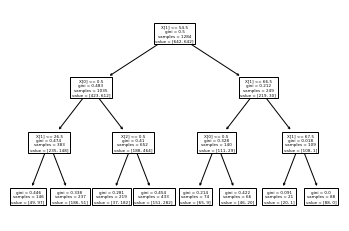

In [10]:
from sklearn import tree
tree.plot_tree(tree_clf);

In [11]:
from sklearn.metrics import confusion_matrix
expected = Y_test
predicted = test_guesses
results = confusion_matrix(expected, predicted)
print(results)

[[130  80]
 [ 10  28]]


In [ ]:
# by oversampling the data we are able to better predict who will survive but at the loss of a being able to predict who will die. Before we predicted all died and now we predict that 56 percent will die. In actuality around 85% would die. To improve this we may need to use a different algorithm or reduce the amount of oversampling that we do.